In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
def build_model(_learning_rate):
    _model = tf.keras.models.Sequential()
    _model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    _model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=_learning_rate),
        loss='mean_squared_error',
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return _model

In [3]:
def train_model(_model, _feature, _label, _epochs, _batch_size):
    _history = _model.fit(
        x=_feature,
        y=_label,
        epochs=_epochs,
        batch_size=_batch_size,
        verbose=1
    )

    _trained_weight = _model.get_weights()[0]
    _trained_bias = _model.get_weights()[1]

    _epochs = _history.epoch
    _hist = pd.DataFrame(_history.history)

    _rmse = _hist['root_mean_squared_error']
    return _trained_weight, _trained_bias, _epochs, _rmse

In [11]:
def plot_model(_trained_weight, _trained_bias, _feature, _label):
    plt.xlabel('feature')
    plt.ylabel('label')

    plt.scatter(_feature, _label, c='red')

    x0 = 0
    y0 = _trained_bias
    x1 = _feature[-1]
    y1 = _trained_bias + _trained_weight * x1

    plt.plot([x0, x1], [y0, y1], c='blue')
    plt.show()

In [14]:
def plot_loss(_epochs, _rmse):
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(_epochs, _rmse, c='blue', label='loss')
    plt.legend()
    plt.ylim([_rmse.min() *0.97, _rmse.max()])
    plt.show()

In [6]:
feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

In [16]:
learning_rate = 0.05
epochs = 125
batch_size = 1

model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(model, feature, label, epochs, batch_size)

Epoch 1/125
12/12 [==============================] - 0s 1ms/step - loss: 895.9937 - root_mean_squared_error: 29.9332
Epoch 2/125
12/12 [==============================] - 0s 733us/step - loss: 645.8694 - root_mean_squared_error: 25.4140
Epoch 3/125
12/12 [==============================] - 0s 774us/step - loss: 479.0447 - root_mean_squared_error: 21.8871
Epoch 4/125
12/12 [==============================] - 0s 635us/step - loss: 343.4603 - root_mean_squared_error: 18.5327
Epoch 5/125
12/12 [==============================] - 0s 680us/step - loss: 236.2884 - root_mean_squared_error: 15.3717
Epoch 6/125
12/12 [==============================] - 0s 771us/step - loss: 146.5753 - root_mean_squared_error: 12.1068
Epoch 7/125
12/12 [==============================] - 0s 771us/step - loss: 82.5624 - root_mean_squared_error: 9.0864
Epoch 8/125
12/12 [==============================] - 0s 954us/step - loss: 40.5779 - root_mean_squared_error: 6.3701
Epoch 9/125
12/12 [==============================] - 0

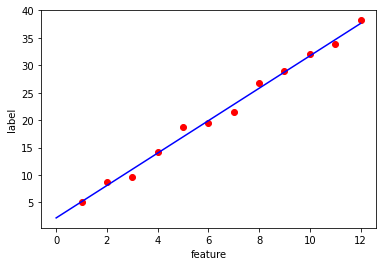

In [12]:
plot_model(trained_weight, trained_bias, feature, label)

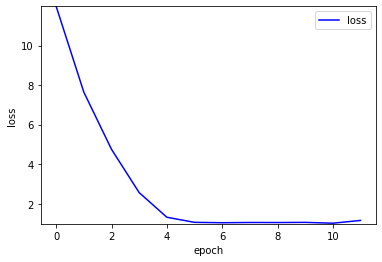

In [15]:
plot_loss(epochs, rmse)